## Final Project Submission 

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


## Beginning
### OverView
    * 

### Business and Data Understanding
#### Business Problem
* a real estate agency that helps homeowners buy and/or sell homes. 
* A business problem you could focus on for this stakeholder is the need to provide advice to homeowners about how home renovations might increase the estimated value of their homes, and by what amount.

# AIM: Maximise price

In [28]:
# import necassary libraries
# The basics
import pandas as pd
import numpy as np

# sklearn
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

# statsmodels
from statsmodels.formula.api import ols
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# scipy
import scipy.stats as stats

# rando
from itertools import combinations

#visualizations
import seaborn as sns
sns.set_style("darkgrid")
import matplotlib.pyplot as plt
%matplotlib inline


#load the data
raw_df = pd.read_csv('data/kc_house_data.csv')
raw_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


### Data Preparation



In [26]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [6]:
''' 
There are no duplicate rows.
'''
raw_df2 = raw_df[raw_df.duplicated(keep=False)]
raw_df2

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15


##### Exploratory Data Analysis of Categorical data

In [7]:
# objects in the dataset
objects_df = raw_df.select_dtypes(include=object)
objects_df

,date,waterfront,view,condition,grade,sqft_basement
0,10/13/2014,NaN,NONE,Average,7 Average,0.0
1,12/9/2014,NO,NONE,Average,7 Average,400.0
2,2/25/2015,NO,NONE,Average,6 Low Average,0.0
3,12/9/2014,NO,NONE,Very Good,7 Average,910.0
4,2/18/2015,NO,NONE,Average,8 Good,0.0
...,...,...,...,...,...,...
21592,5/21/2014,NO,NONE,Average,8 Good,0.0
21593,2/23/2015,NO,NONE,Average,8 Good,0.0
21594,6/23/2014,NO,NONE,Average,7 Average,0.0
21595,1/16/2015,NaN,NONE,Average,8 Good,0.0


In [8]:
# find unique varibles and null values in the categorical data
for column in objects_df.columns:
    print(f"COLUMN name: '{column}'")
    print(f"No. of unique values: {len(objects_df[column].unique())}")
    print(f"No. of null values: {objects_df[column].isnull().sum()}")
    print(f"% of null values: {(objects_df[column].isnull().sum() / len(objects_df[column]) * 100) }")
    print(objects_df[column].value_counts())
    print()

COLUMN name: 'date'
No. of unique values: 372
No. of null values: 0
% of null values: 0.0
6/23/2014    142
6/26/2014    131
6/25/2014    131
7/8/2014     127
4/27/2015    126
            ... 
5/24/2015      1
1/31/2015      1
1/10/2015      1
5/17/2014      1
7/27/2014      1
Name: date, Length: 372, dtype: int64

COLUMN name: 'waterfront'
No. of unique values: 3
No. of null values: 2376
% of null values: 11.00152798999861
NO     19075
YES      146
Name: waterfront, dtype: int64

COLUMN name: 'view'
No. of unique values: 6
No. of null values: 63
% of null values: 0.29170718155299347
NONE         19422
AVERAGE        957
GOOD           508
FAIR           330
EXCELLENT      317
Name: view, dtype: int64

COLUMN name: 'condition'
No. of unique values: 5
No. of null values: 0
% of null values: 0.0
Average      14020
Good          5677
Very Good     1701
Fair           170
Poor            29
Name: condition, dtype: int64

COLUMN name: 'grade'
No. of unique values: 11
No. of null values: 0
% 

Exploring the categorical variables:
|Variable       | Type       | values  | Strategy|
| :-----:       | :-----:    | :-----: | :-----: |
|`date`         | Categorical|* mm/dd/yyyy | 
|`waterfront`   | Boolean    | * YES/NO <br /> * 11% null values | replace null values to 'NO'
|`view`         | Categorical|* 6 unique values <br />* 0.29% null values| fill null values with 'NONE'
|`condtion`     | Categorical|* 5 unique <br/>* 0 null | * map the variable to match the description
|`grade`        | Ordinal    |* 11 uniique <br /> * numeric value and desc. | clean the column to show numeric value and remove the description
|`sqft_basement`| Boolean    |* float <br /> * '?' placeholder <br /> * area cannot be 0.0sqft | * create column has_basement <br /> * values:1/0

##### Cleaning categorical data

1. `waterfront` column: replace null values to 'NO'

In [31]:
# 1. replace `waterfront`` {np.nan:'NO'}
raw_df['waterfront'].replace({np.nan:'NO'}, inplace=True)

wtrfrnt = []
for val in raw_df['waterfront']:
    if val == 'NO':
        wtrfrnt.append('0')
    else:
        wtrfrnt.append('1')
        
raw_df['waterfront'] = wtrfrnt

#check
raw_df['waterfront'].value_counts()

0    21451
1      146
Name: waterfront, dtype: int64

2. `view` column: fill null values with 'NONE'

In [15]:
# 2. change `view` null values to 'NONE'
raw_df['view'].fillna('NONE', inplace=True)

#check
raw_df['view'].value_counts()

NONE         19485
AVERAGE        957
GOOD           508
FAIR           330
EXCELLENT      317
Name: view, dtype: int64

3. `condition` column: map conditions to their numerical key-value pair


In [35]:
#Map condition column to numerical codes
condition_mapping = {'Poor': 1, 'Fair': 2, 'Average': 3, 'Good': 4, 'Very Good': 5}
raw_df['condition'] = raw_df['condition'].map(condition_mapping)

raw_df.condition.value_counts()

3    14020
4     5677
5     1701
2      170
1       29
Name: condition, dtype: int64

4. `grade` column: show numeric value and remove the description

In [16]:
# keep 'grade' as int and remove description
raw_df['grade'] = [int(grade[:2]) for grade in objects_df['grade']]

#check
raw_df['grade'].value_counts()

7     8974
8     6065
9     2615
6     2038
10    1134
11     399
5      242
12      89
4       27
13      13
3        1
Name: grade, dtype: int64

5. `sqft_basement` column: if value '0.0' or '?' append new column 0, else 1


In [34]:
basement = []
for sq_ft in raw_df['sqft_basement']:
    if sq_ft == '0.0':
        basement.append('0')
    elif sq_ft == '?':
        basement.append('0')
    else:
        basement.append('1')
        
raw_df['has_basement'] = basement

# drop `sqft_basement`
raw_df = raw_df.drop('sqft_basement', axis=1)

# check 
raw_df.head()

KeyError: 'sqft_basement'

##### Creating dummy variables of categorical data

##### Exploratory Data Analysis of Numerical data

In [139]:
# get a;; numerical columns
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

cont_df = raw_df.select_dtypes(include=numerics)
cont_df

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,1180,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,2170,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,770,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,1050,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,1680,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,360000.0,3,2.50,1530,1131,3.0,1530,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,400000.0,4,2.50,2310,5813,2.0,2310,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,402101.0,2,0.75,1020,1350,2.0,1020,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,400000.0,3,2.50,1600,2388,2.0,1600,2004,0.0,98027,47.5345,-122.069,1410,1287


Plot scatter matrix to see if the variables have relation to price, detect for ordinal data or if columns have outliers

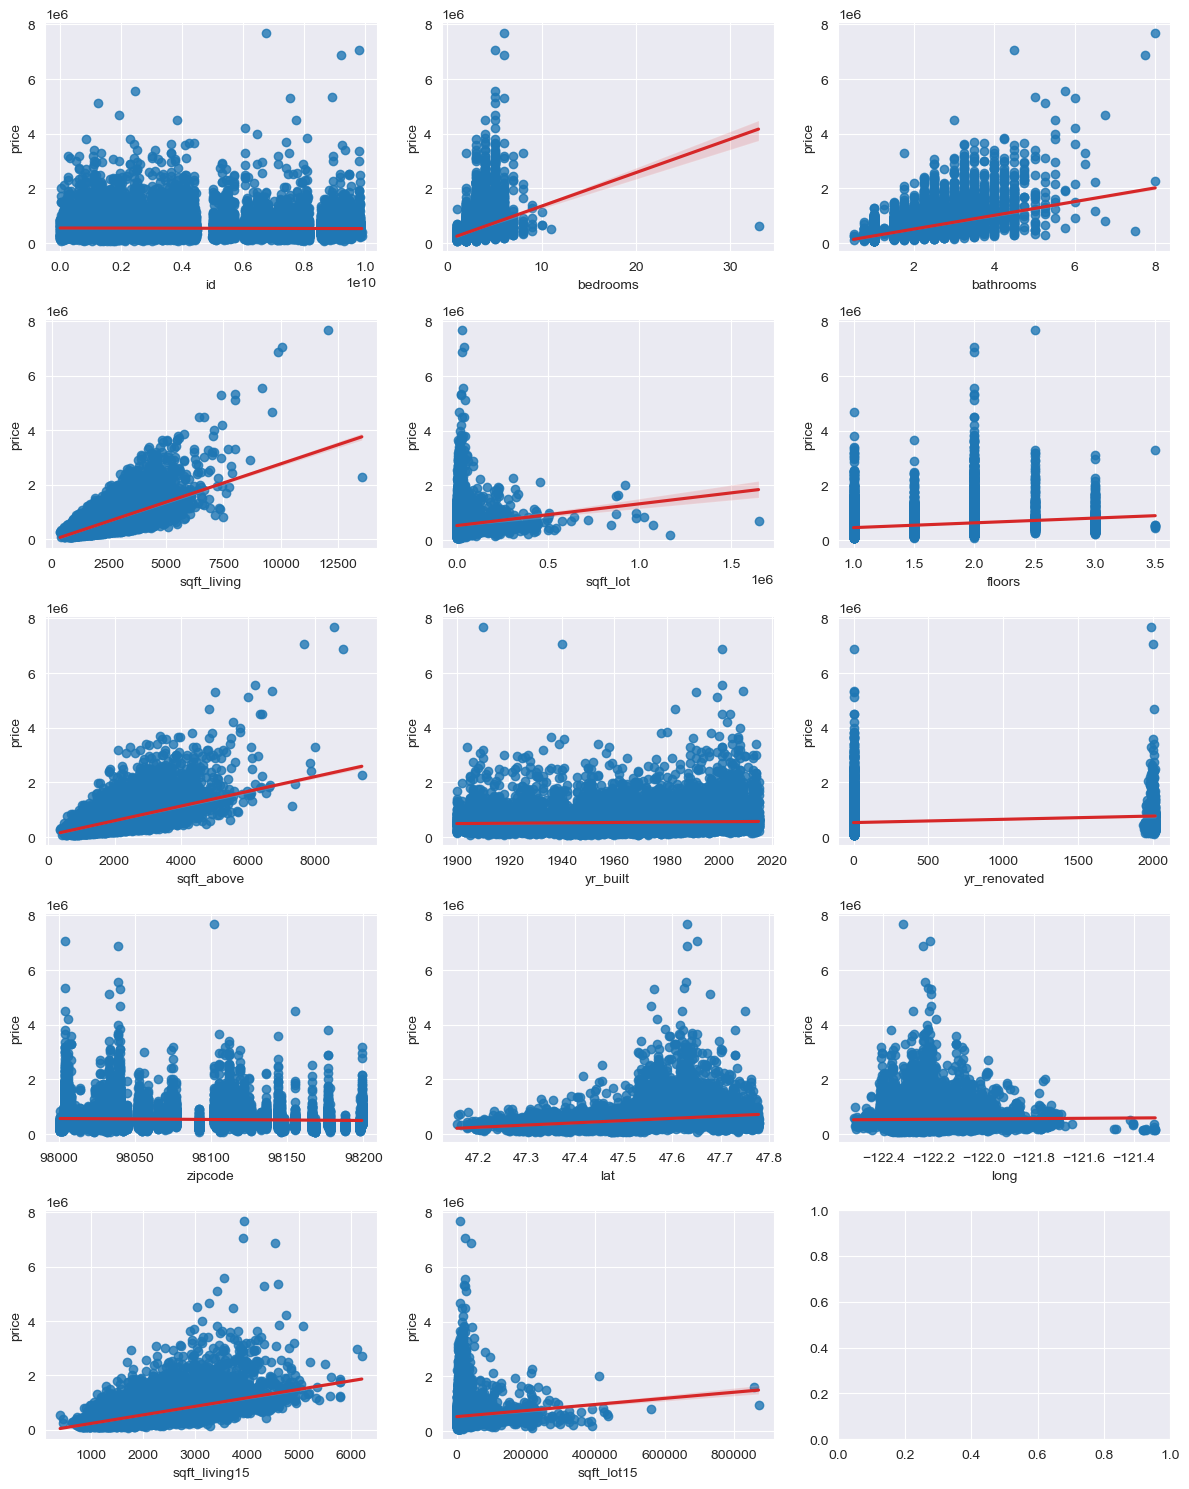

In [140]:
#looping over all columns  
plots = cont_df.drop('price', axis=1)

fig, axes = plt.subplots(ncols=3, nrows=5, figsize=(12, 15))
fig.set_tight_layout(True)

for index, col in enumerate(plots.columns):
    ax = axes[index//3][index%3]
    sns.regplot(x = col, y = 'price', data = cont_df, ax=ax, line_kws={"color": "tab:red"})
    ax.set_xlabel(col)
    ax.set_ylabel("price")

Summary from relationship between parameters and price
| columns  | Observation | Strategy |
| :------: | :-------: | :-----: |
|`id`, `zipcode`, `yr_built`, `yr_renovated`, `lat`, `long`| flat horizontal line, reflecting that there is no relationship between the parameters and price of a propoerty | Drop these columns |
| `bedrooms`, `sqft_lot15`, `sqft_lot`, `sqft_living` | Presence of outliers | Remove outliers  

In [141]:
# drop columns with no replationship
cont_df.drop(['id', 'zipcode', 'yr_built', 'yr_renovated', 'lat', 'long'], axis=1, inplace=True)
cont_df

c:\Users\Joan\anaconda3\envs\learn-env\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,1180,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,2170,1690,7639
2,180000.0,2,1.00,770,10000,1.0,770,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,1050,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,1680,1800,7503
...,...,...,...,...,...,...,...,...,...
21592,360000.0,3,2.50,1530,1131,3.0,1530,1530,1509
21593,400000.0,4,2.50,2310,5813,2.0,2310,1830,7200
21594,402101.0,2,0.75,1020,1350,2.0,1020,1020,2007
21595,400000.0,3,2.50,1600,2388,2.0,1600,1410,1287


##### Detect outliers using boxplots

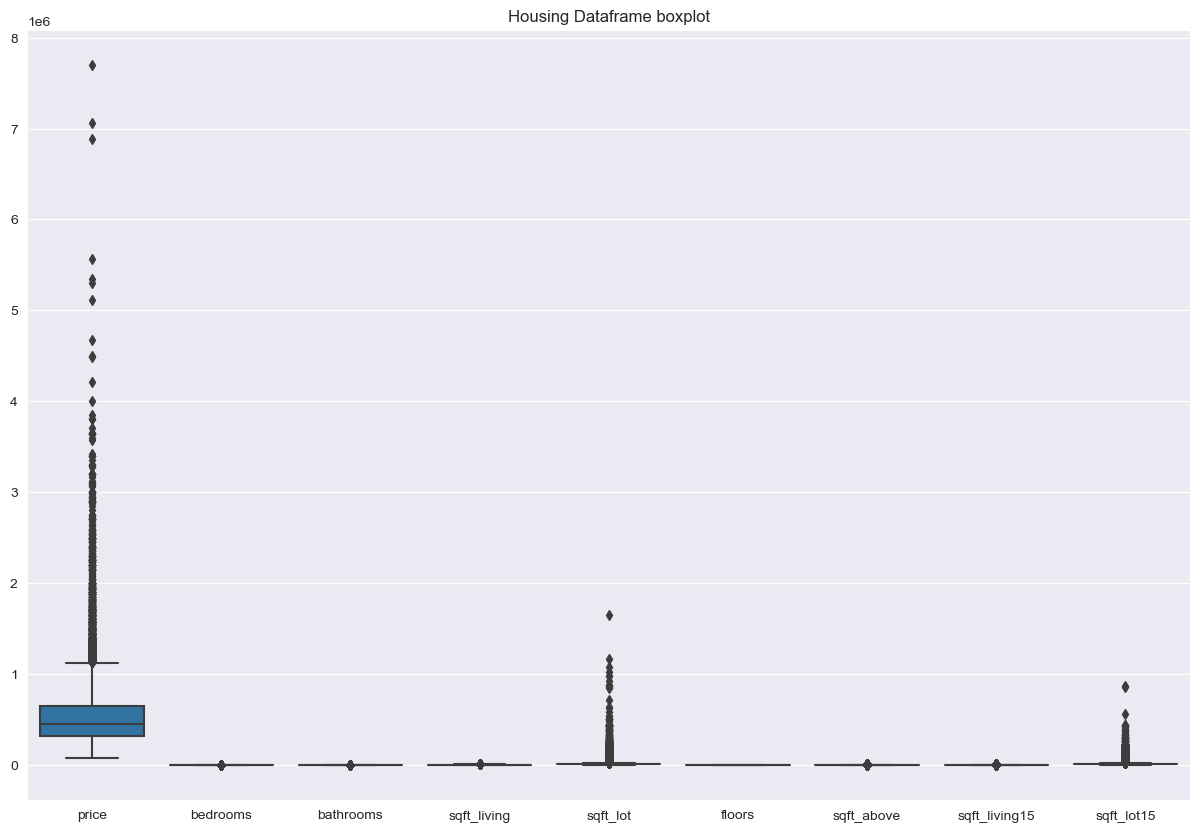

In [142]:
# Lets check for outliers. Lets plot our boxplot
# using seaborn
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data = cont_df, ax=ax)

# Set the plot title
plt.title('Housing Dataframe boxplot')

# Show the plot
plt.show();

Price appears to have many outliers. it would be necessary to see by how much the values deviate from the mean

In [143]:
# view metrics of price
cont_df['price'].describe()


count    2.159700e+04
mean     5.402966e+05
std      3.673681e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

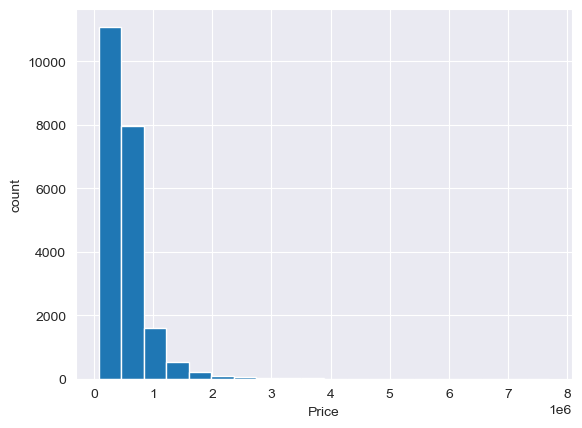

In [144]:
# cont_df = cont_df[cont_df['price']<3000000]
plt.hist(cont_df.price, bins=20, rwidth=1)
plt.xlabel('Price')
plt.ylabel('count')
plt.show()

The min. price is 78000 USD which is sensible.
The max. price 7,700,000 USD which seems to be an outlier. The mean is much lower than this and as thus would be necessary to set a threshold over values of the price that would minimise deviation.

In [153]:
upper_limit = cont_df['price'].mean() + (10* cont_df['price'].std()) # Right from the mean
lower_limit = (cont_df['price'].mean()) - (10* cont_df['price'].std()) # Left from the mean
print(upper_limit)
print(lower_limit)

4213977.974519525
-3133384.8275083657


In [157]:
price_limits = cont_df[(cont_df.price<upper_limit) | (cont_df.price<lower_limit) ]
price_limits

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,1180,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,2170,1690,7639
2,180000.0,2,1.00,770,10000,1.0,770,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,1050,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,1680,1800,7503
...,...,...,...,...,...,...,...,...,...
21592,360000.0,3,2.50,1530,1131,3.0,1530,1530,1509
21593,400000.0,4,2.50,2310,5813,2.0,2310,1830,7200
21594,402101.0,2,0.75,1020,1350,2.0,1020,1020,2007
21595,400000.0,3,2.50,1600,2388,2.0,1600,1410,1287


In [ ]:
# is there really a 30+ bedroom house?
cont_df['bedrooms'].value_counts()


In [ ]:
# drop that 1 it's obviously an anomaly 
cont_df = cont_df[cont_df['bedrooms']<30]

In [ ]:
#looping over all columns  
plots = cont_df.drop('price', axis=1)

fig, axes = plt.subplots(ncols=3, nrows=3, figsize=(12, 15))
fig.set_tight_layout(True)

for index, col in enumerate(plots.columns):
    ax = axes[index//3][index%3]
    sns.regplot(x = col, y = 'price', data = cont_df, ax=ax, line_kws={"color": "tab:red"})
    ax.set_xlabel(col)
    ax.set_ylabel("price")

In [ ]:
# see correlation between parameters and price
corr_matrix = raw_df.corr()
corr_matrix['price'].sort_values(ascending=False)

### Modelling

In [ ]:
# see correlation between parameters and price
# helps to select the baseline model
corr_matrix = raw_df.corr()
corr_matrix['price'].sort_values(ascending=False)

we opt to use the sqft_living as it has the highest correlation to the price of a property.

In [ ]:
#define x and y
y = raw_df['price']
X_linear = raw_df[['sqft_living']]

In [ ]:
#create baseline model
baseline_model = ols(y, sm.add_constant(X_linear))
baseline_results = baseline_model.fit()

print(baseline_results.summary())

##### Model 1 Results: Sqft_living in relation to price
Looking at the summary above, the regression line we foundis

                `price^= −43990 + 280.8630sqftliving`
Our y intercept in Model 1 is -24,220.
The model is statistically significant, with an F-statistic p-value well below 0.05
The model (R-squared) explains about 48.5% of the variance in price.
The model coefficients (const and sqft_living) are both statistically significant, with t-statistic p-values well below 0.05
If a house has sqft_living space of 0 feet squared, we would expect the price to be about USD -24,220
For each increase of 1 square foot in sqft_living space, the price increases by USD 270.16

### Regression Results

### Recommendations

### Next Steps